# Project for Machine Learning and Statistics - December 2021


## Submitted by Sinéad Duffy, ID 10016151

***

### Notebook 1

#### Problem Statement - write an overview of the scikit-learn library, and outline (using examples) 3 algorithms of that package

***


### Introduction

Scikit-learn is a library within Python that allows for machine learning scenarios to be completed using regression / classifification as well as clustering.[^1] [^2] The library draws on other packages / libraries such as NumPy, Matplotlib, Pandas etc in to improve functionality.[^3]  
<br>
The scikit-learn library allows developers to use supervised and unsupervised learning algorithms to test data that is loaded using a .csv file (in the case of this noteook).  Within supervised learning 17 distinct areas are outlined, such as linear models, kernel ridge regression, stochastic gradient descent, nearest neighbours and decision tress.[^1]        Unsupervisied learning has 9 distinct areas such as Gaussian mixture models, manifold learning, clustering and biclustering.[^1]
<br><br>
As outlined above, the brief of this notebook is to outline 3 of the algorithms of the scikit-learn library, using examples.  For that reason, the notebook will be segmented into;<br>

1. Introduction
2. Algorithn 1 
3. Algorithn 2 
4. Algorithm 3
5. Conclusion
6. References

<br>
The refrences used throughout the notebook are outlined in section 5. Throughout the notebook footnotes are used to indicate where the specific refrences are used.
<br><br>
The notebook also contains a number of cells containing code. Each of these are outlined in subsequent sections.
<br>
<br>
The choosen algorithms for this package are;
<br><br>

### Introduction to Machine Learning with scikit-learn

https://scikit-learn.org/stable/tutorial/basic/tutorial.html

In [2]:
# importing libraries

import csv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


### The Heart Disease Data Set.

As outline above, the choosen dataset consists of 303 rows and 14 distict attributes.  The original dataset had 76 distinct attributes.  For the purpose of this notebook, the dataset has been consolidated to 14 distinct attributes.

Each of the attributes can be as [5] 

- Age: the age of the patient.
- Sex: displays the gender of the patient, shown as either 1 = male  or 0 = female
- Chest-pain type: displays the type of chest-pain experienced by the patient shown as 1 = typical angina / 2 = atypical angina / 3 = non — anginal pain / 4 = asymptotic
- Resting Blood Pressure: displays the resting blood pressure value of the patient in units of mmHg
- Serum Cholestrol: displays the serum cholesterol in units of mg/dl
- Fasting Blood Sugar: compares the fasting blood sugar value of the patient with 120mg/dl. Fasting been shown as blood sugar less than 120mg/dl is 1 (true)  ....   else : 0 (false)
- Resting ECG : shows the resting electrocardiographic results of 0 = normal / 1 = having ST-T wave abnormality / 2 = left ventricular hyperthrophy
- Max heart rate achieved : shows the max heart rate of the patiend.
- Exercise induced angina is shown by either a 1 = yes  or  0 = no
- ST depression induced by exercise relative to rest: is shown by a value which is an integer or float.
- Peak exercise ST segment : is shown as either 1 = upsloping / 2 = flat / 3 = downsloping
- Number of major vessels (0–3) colored by flourosopy
- Thal : shows the thalassemia of the patient and it is either 3 = normal / 6 = fixed defect / 7 = reversible defect
- Num : shows if the patient has heart disease or not and the values are either 0 = absence / 1, 2, 3, 4 = present



In [3]:
#importing a csv file using pandas
df = pd.read_csv('Datasets\heart.csv')

#print the summary data of the datafile
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    int64  
 1   Sex       303 non-null    int64  
 2   CP        303 non-null    int64  
 3   Trestbps  303 non-null    int64  
 4   Chol      303 non-null    int64  
 5   FBS       303 non-null    int64  
 6   RestECG   303 non-null    int64  
 7   Thalach   303 non-null    int64  
 8   Exang     303 non-null    int64  
 9   OldPeak   303 non-null    float64
 10  Slope     303 non-null    int64  
 11  CA        303 non-null    object 
 12  Thal      303 non-null    object 
 13  Num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB
None


In [5]:
# print the dataframe and show the types of data that it contains
print(df)

     Age  Sex  CP  Trestbps  Chol  FBS  RestECG  Thalach  Exang  OldPeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     Slope CA  Thal  Num  
0        3   0    6    0  
1        2   3    3    2  
2     

In [6]:
# describe the main stat's output of the data frame
df.describe()

,Age,Sex,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,OldPeak,Slope,Num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


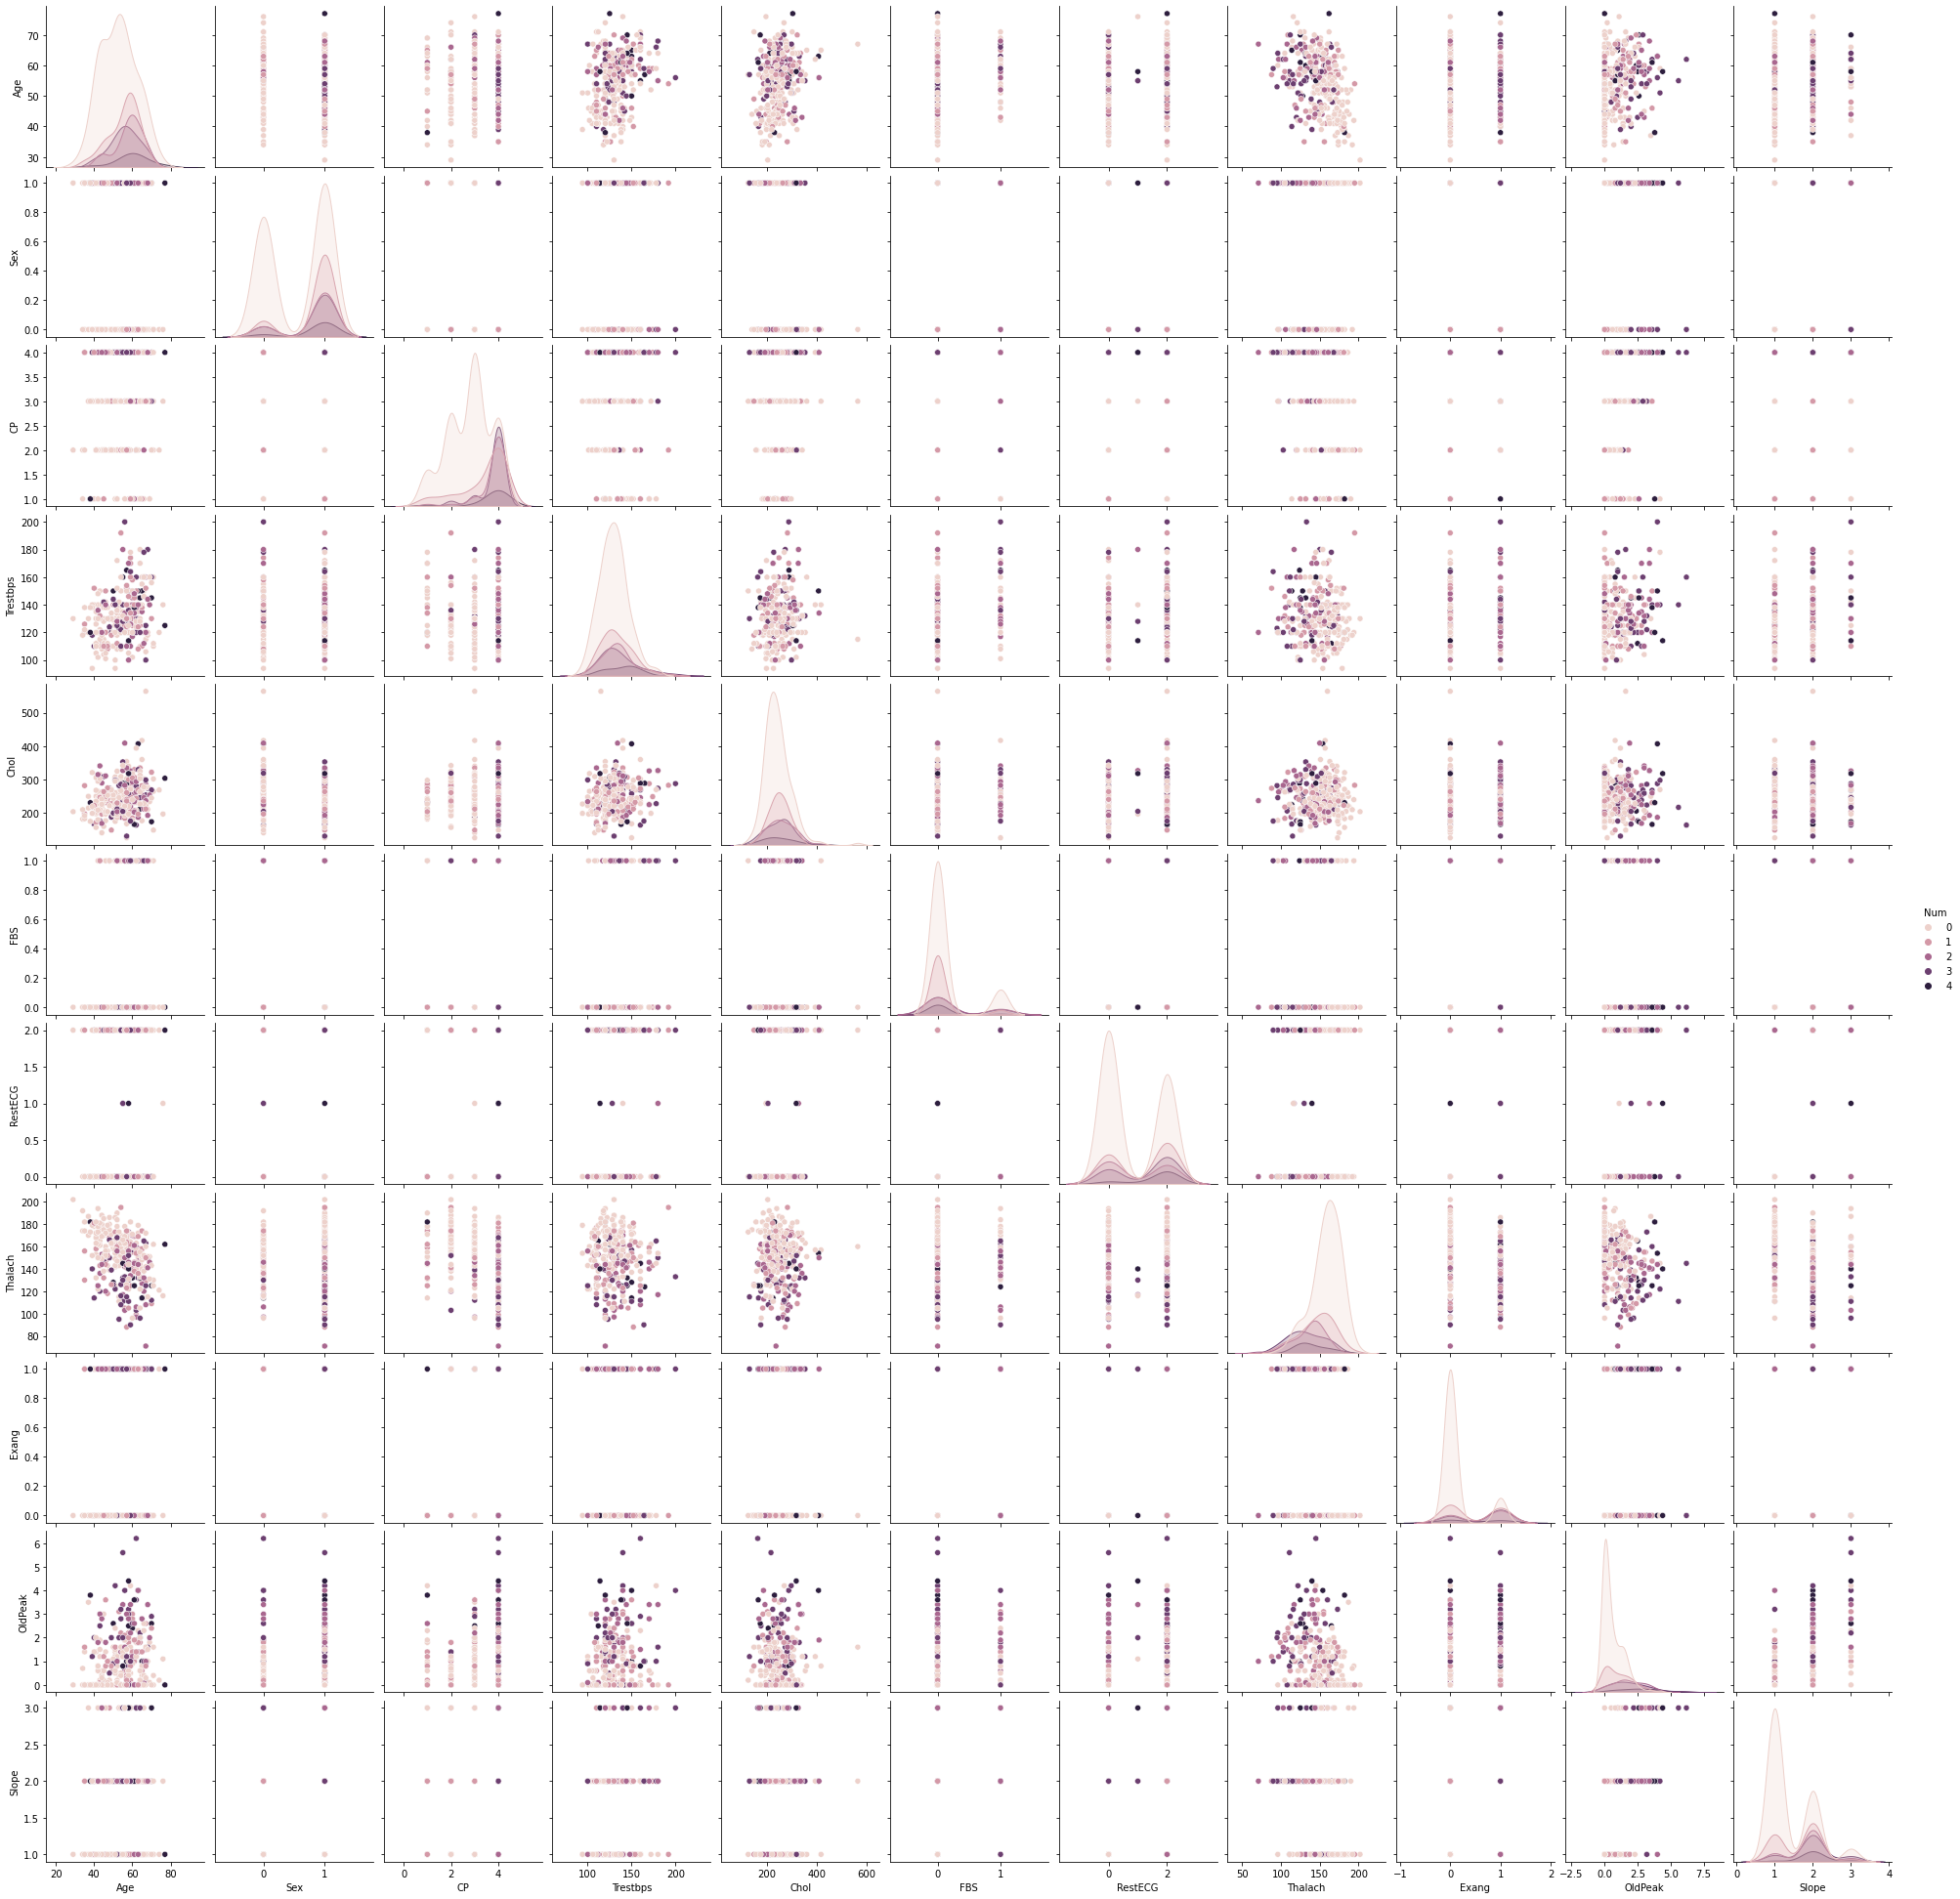

In [11]:
#plot all the variables against each other to see what the data looks like.
sns.pairplot(df, hue="Num")

The pair plot above helps to show all the variables, and to see if any relationships or correlations exist between them.  The data in the pair plot plotted against the variable (hue) Num.  As described above, if the value of Num is 0, then no heart diease is found in the patient.  A value over 0 outlines that heart diease is present in the patient.
<br><br>
Visualising the data using Seaborn's pairplot, helps to show that relationships / correlations exist between several of the variables.  For example, OldPeak shows correlations with Age / Testbps / Chol and Thalach.  The correlations are both positive as in OldPeak with Chol, Testbps and Thalach, as well as neutral in the case of OldPeak and Age.
<br>

### Classification Problem

The data set is described above.  The purpose of this notebook is to look at the data, and see if it is possible to predict if heart diesase is present in a given patient.  

The last column in the dataset (Num) outlines the if heart diesease is present or not.  If the result is 0, then no heart diesease is found, any result greater than this (0 to 4) has some level of heart diease found in the patient.

The following sections will outline how classification is completed for the heart diease dataset.

### References:

1.  Scikit-learn.org https://scikit-learn.org/stable/tutorial/index.html
2.  Wikipedia.com / scikit-learn - https://en.wikipedia.org/wiki/Scikit-learn
3.  MachineLearningMastery.com / Introductuin to scikit-learn - https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
4.  UCI Machine Learning Repository - https://archive.ics.uci.edu/ml/datasets/Heart+Disease
5.  Toward Data Science - https://towardsdatascience.com/heart-disease-prediction-73468d630cfc



## End
